### 1. MLP

In [1]:
# import library
import numpy as np

# Assign variables

# Weights
W1 = np.array([[1,-2],[3,4]])
W2 = np.array([[2,2],[2,-3]])

# Biases
b1 = np.array([[1],[0]])
b2 = np.array([[0],[-4]])

# MLP function
def mlpfunc(input, weight, bias):

    h = np.dot(weight, input)+bias   # Output for layer l
    h[h<0] = 0   # ReLU

    return h

# Input
a0 = np.array([[1],[-1]])

a1 = mlpfunc(a0,W1,b1)
a2 = mlpfunc(a1,W2,b2)

# Output activation
print('Output activation:')
print(a2)

Output activation:
[[8]
 [4]]


### 2. HD5

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

DEBUG = False
DATA_FNAME = 'WoojaeJeong_HW3_Prb2.hd5'

if DEBUG:
    num_sequences = 3
    sequence_length = 4
else:
    num_sequences = 25
    sequence_length = 20

human_binary = np.array([
    [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0 ,1, 1, 1, 1, 0, 0, 0, 1, 1],
    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
    [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1],
    [0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
    [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0],
    [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
    ])

### do some error trapping:

assert human_binary.shape[0] == num_sequences, 'Error: the number of sequences was entered incorrectly'
assert human_binary.shape[1] == sequence_length, 'Error: the length of the seqeunces is incorrect'

# the with statement opens the file, does the business, and close it up for us...
with h5py.File(DATA_FNAME, 'w') as hf:
    hf.create_dataset('human_binary', data = human_binary)
    ## note you can write several data arrays into one hd5 file, just give each a different name.

###################
# Let's read it back from the file and then check to make sure it is as we wrote...
with h5py.File(DATA_FNAME, 'r') as hf:
    hb = hf['human_binary'][:]

### this will throw and error if they are not the same...
np.testing.assert_array_equal(human_binary, hb)

hb


array([[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 0, 0, 1, 0,

### 3. Logistic regression

(a) Logistic "2" detector

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

# File name
Data_fName = 'mnist_traindata.hdf5'

# Desired number
DETECT_CLASS = 2

# Read train data
with h5py.File(Data_fName, 'r+') as df:
    xdata = df['xdata'][:]
    ydata = df['ydata'][:]

    # Find index for DETECT_CLASS (=2)
    target = (ydata.argmax(axis=1) == DETECT_CLASS)+0

# File name
Data_fName = 'mnist_testdata.hdf5'

# Desired number
DETECT_CLASS = 2

# Read test data
with h5py.File(Data_fName, 'r+') as df:
    xdata_test = df['xdata'][:]
    ydata_test = df['ydata'][:]

    # Find index for DETECT_CLASS (=2)
    target_test = (ydata_test.argmax(axis=1) == DETECT_CLASS)+0


In [4]:
# Logistic regression code

def sigmoid(data):
    return 1 / (1 + np.exp(-data))

# define probability
def p_x(data, weights, bias):
    px = sigmoid(data @ weights + bias)

    return px

def compute_cost(data, target, weights, bias, regcoef, regterm):

    px = p_x(data, weights, bias).squeeze()
    N = len(target)

    if regterm == 'l1':
        # l1 regularization
        regularization = regcoef*np.sum(np.abs(weights)).squeeze()

    if regterm == 'l2':
        # l2 regularization
        regularization = regcoef*np.sum(np.square(weights)).squeeze()
    
    if regterm == 'norm':
        regularization = 0
    
    cost = -(np.sum(target * np.log(px) + (1 - target) * np.log(1 - px)))/N + regularization

    return cost

def gradient_descent(data, target, weights, bias, regcoef, regterm, lrate, iterations, thresh):

    # Sample size
    N = len(target)
    prev_cost = float('inf')

    accuracy_data = []; loss_data = []

    for _ in range(iterations):
                
        # define p(x)
        px = sigmoid(np.dot(data, weights) + bias).squeeze()

        # Cost
        cost = compute_cost(data, target, weights, bias, regcoef, regterm)

        # Gradients for the weights
        if regterm == 'l1':
            weights_grad = np.dot(data.T, px - target)/N + regcoef*np.sign(weights).squeeze()

        if regterm == 'l2':
            weights_grad = np.dot(data.T, px - target)/N + regcoef*weights.squeeze()

        if regterm == 'norm':
            weights_grad = np.dot(data.T, px - target)/N
        
        bias_grad = np.sum(px-target)/N

        weights -= lrate * weights_grad
        bias -= lrate * bias_grad

        # Convergence threshold
        if abs(prev_cost - cost) < thresh:  # if not, run until the maximum iteration
            break
        
        prev_cost = cost

        accuracy = np.sum((px >= 0.5)+0 == target)/len(data)
        accuracy_data.append(accuracy)
        loss_data.append(cost)
    return accuracy, cost, weights, bias, accuracy_data, loss_data

In [5]:
# Hyperparameters for GD without regularization

lrate = 0.1
iterations = 200
regcoef = 0.01
thresh = 1e-6
regterm = 'norm'

# Initialize weights and bias
weights = np.zeros((xdata.shape[1],1)).squeeze()
bias = 0

# Train the model
accuracy_norm, cost_norm, weights_norm, bias_norm, accuracy_data_norm, loss_data_norm = gradient_descent(xdata, target, weights, bias, regcoef, regterm, lrate, iterations, thresh)

# Test the model
accuracy_test_norm, cost_test_norm, weights_test_norm, bias_test_norm, accuracy_data_test_norm, loss_data_test_norm = gradient_descent(xdata_test, target_test, weights_norm, bias_norm,regcoef, regterm, lrate, iterations, thresh)

In [6]:
# Hyperparameters for GD wit l1 regularization

lrate = 0.1
iterations = 200
regcoef = 0.01
thresh = 1e-6
regterm = 'l1'

# Initialize weights and bias
weights = np.zeros((xdata.shape[1],1)).squeeze()
bias = 0

# Train the model
accuracy_l1, cost_l1, weights_l1, bias_l1, accuracy_data_l1, loss_data_l1 = gradient_descent(xdata, target, weights, bias, regcoef, regterm, lrate, iterations, thresh)

# Test the model
accuracy_test_l1, cost_test_l1, weights_test_l1, bias_test_l1, accuracy_data_test_l1, loss_data_test_l1 = gradient_descent(xdata_test, target_test, weights_l1, bias_l1,regcoef, regterm, lrate, iterations, thresh)

In [7]:
# Hyperparameters for GD wit l2 regularization

lrate = 0.1
iterations = 200
regcoef = 0.01
thresh = 1e-6
regterm = 'l2'

# Initialize weights and bias
weights = np.zeros((xdata.shape[1],1)).squeeze()
bias = 0

# Train the model
accuracy_l2, cost_l2, weights_l2, bias_l2, accuracy_data_l2, loss_data_l2 = gradient_descent(xdata, target, weights, bias, regcoef, regterm, lrate, iterations, thresh)

# Test the model
accuracy_test_l2, cost_test_l2, weights_test_l2, bias_test_l2, accuracy_data_test_l2, loss_data_test_l2 = gradient_descent(xdata_test, target_test, weights_l2, bias_l2,regcoef, regterm, lrate, iterations, thresh)

##### Answers

i) I tried the learning rate for 0.01, 0.1, and 1. Lower the learning rate, it took longer to learn the features. I chose 0.1 which gave me relatively good results within a minute for 200 iterations.

ii) I let the model to run for maximum iteration if it does not meet the convergence threshold.

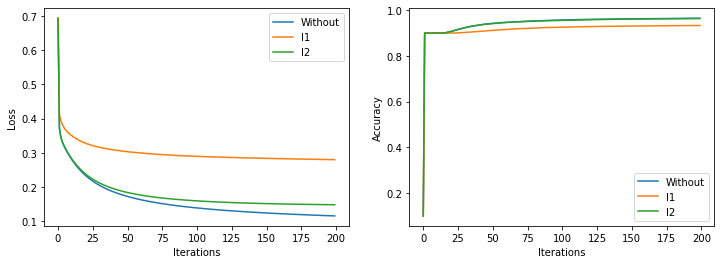

In [8]:
it = np.arange(200)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(121)
plt.plot(it, loss_data_norm)
plt.plot(it, loss_data_l1)
plt.plot(it, loss_data_l2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Without','l1','l2'])


x = fig.add_subplot(122)
plt.plot(it, accuracy_data_norm)
plt.plot(it, accuracy_data_l1)
plt.plot(it, accuracy_data_l2)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Without','l1','l2'])
plt.show()


iii) I tried l1 and l2 regularization. With my set, implementing both l1, l2 regularization yielded higher loss and lower accuracy compared to the model without one. However, it prevents potential overfitting.

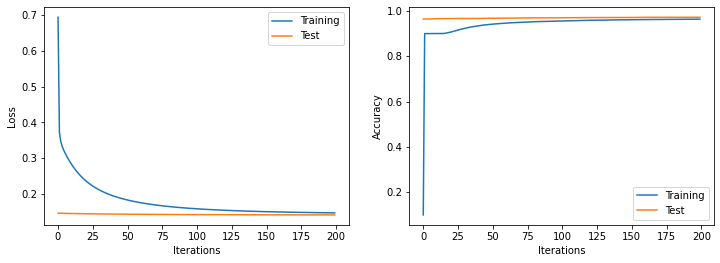

Training
Accuracy = 0.9645833333333333
Loss = 0.14801098072065189
Test
Accuracy = 0.973
Loss = 0.14235155961273654


In [9]:
# Loss and accuracy plot for model with l2 regularization

it = np.arange(200)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(121)
plt.plot(it, loss_data_l2)
plt.plot(it, loss_data_test_l2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training','Test'])

x = fig.add_subplot(122)
plt.plot(it, accuracy_data_l2)
plt.plot(it, accuracy_data_test_l2)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Training','Test'])
plt.show()

# Print out the final loss and finial accuracy for training and test set.
print('Training')
print('Accuracy =', accuracy_l2)
print('Loss =', cost_l2)

print('Test')
print('Accuracy =', accuracy_test_l2)
print('Loss =', cost_test_l2)


In [10]:
# Create .hd5 files

DATA_FNAME = 'WoojaeJeong_HW3_Prb3a.hd5'
with h5py.File(DATA_FNAME, 'w') as hf:
    hf.create_dataset('w', data = np.asarray(weights_l2))
    hf.create_dataset('b', data = np.asarray(bias_l2))

(b) Softmax classification: gradient descent

In [99]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

# load data
# File name
Data_fName = 'mnist_traindata.hdf5'

# Read train data
with h5py.File(Data_fName, 'r+') as df:
    xdata = df['xdata'][:]
    ydata = df['ydata'][:]

# File name
Data_fName = 'mnist_testdata.hdf5'

# Read train data
with h5py.File(Data_fName, 'r+') as df:
    xdata_test = df['xdata'][:]
    ydata_test = df['ydata'][:]

num_classes = 10

In [100]:
def softmax(data):
    z = np.exp(data - np.max(data))
    return z / z.sum(axis =1, keepdims=True)

def cost_softmax(data, target, weights, bias):
    N = len(target)
    px = softmax(np.dot(data, weights) + bias)
    cost = -np.sum(target * np.log(px + 10e-10)) / N

    return cost

def gradient_descent_softmax(xdata, ydata, weights, bias, lrate, iterations, thresh):

    # Sample size
    N = len(ydata)
    prev_cost = float('inf')

    accuracy_data = []; loss_data = []

    for _ in range(iterations):
                
        # define p(x)
        px = softmax(np.dot(xdata, weights) + bias)

        # Cost
        cost = cost_softmax(xdata, ydata, weights, bias)

        # Gradients for the weights
        weights_grad = np.dot(xdata.T, px - ydata)/N        
        bias_grad = np.sum(px - ydata)/N

        weights -= lrate * weights_grad
        bias -= lrate * bias_grad

        # Convergence threshold
        if abs(prev_cost - cost) < thresh:  # if not, run until the maximum iteration
            break
        
        prev_cost = cost

        accuracy = np.sum(np.argmax(px, axis=1) == np.argmax(ydata, axis=1))/N
        accuracy_data.append(accuracy)
        loss_data.append(cost)
    return accuracy, cost, weights, bias, accuracy_data, loss_data

In [101]:
# Hyperparameters

lrate = 0.1
iterations = 200
thresh = 1e-6

weights = np.zeros((xdata.shape[1],num_classes))
bias = np.zeros((1,num_classes))

# Train the model
accuracy, cost, weights_train, bias_train, accuracy_data, loss_data = gradient_descent_softmax(xdata, ydata, weights, bias, lrate, iterations, thresh)

# Test the model
accuracy_test, cost_test, weights_test, bias_test, accuracy_data_test, loss_data_test = gradient_descent_softmax(xdata_test, ydata_test, weights, bias, lrate, iterations, thresh)

(ii) I chose the learning rate = 0.1

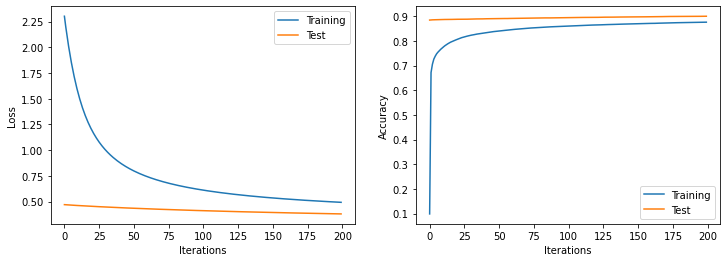

Training
Accuracy = 0.8759333333333333
Loss = 0.4925534953935439
Test
Accuracy = 0.9
Loss = 0.3797783969872003


In [102]:

it = np.arange(200)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(121)
plt.plot(it, loss_data)
plt.plot(it, loss_data_test)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training','Test'])

x = fig.add_subplot(122)
plt.plot(it, accuracy_data)
plt.plot(it, accuracy_data_test)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Training','Test'])
plt.show()

# Print out the final loss and finial accuracy for training and test set.
print('Training')
print('Accuracy =', accuracy)
print('Loss =', cost)

print('Test')
print('Accuracy =', accuracy_test)
print('Loss =', cost_test)

(c) Softmax classification: stochastic gradient descent

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt 

# load data
# File name
Data_fName = 'mnist_traindata.hdf5'

# Read train data
with h5py.File(Data_fName, 'r+') as df:
    xdata = df['xdata'][:]
    ydata = df['ydata'][:]

# File name
Data_fName = 'mnist_testdata.hdf5'

# Read train data
with h5py.File(Data_fName, 'r+') as df:
    xdata_test = df['xdata'][:]
    ydata_test = df['ydata'][:]

num_classes = 10

In [12]:
def softmax(data):
    z = np.exp(data - np.max(data))
    return z / z.sum(axis =1, keepdims=True)

def cost_softmax(data, target, weights, bias):
    N = len(target)
    px = softmax(np.dot(data, weights) + bias)
    cost = -np.sum(target * np.log(px + 10e-10)) / N

    return cost

def SGD_softmax(xdata, ydata, weights, bias, lrate, iterations, batch_size):

    # Sample size
    N = len(ydata)
    prev_cost = float('inf')

    accuracy_batch = []; loss_batch = []
    batch_plot = 5000

    for _ in range(iterations):
        for idx in range(0, N, batch_size):
            
            batch_end_idx = min(idx + batch_size, N)

            x_batch, y_batch = xdata[idx:batch_end_idx], ydata[idx:batch_end_idx]
            
            # define p(x)
            px = softmax(np.dot(x_batch, weights) + bias)

            # Gradients for the weights
            weights_grad = -np.dot(x_batch.T, y_batch - px)/batch_size   
            bias_grad = -np.sum(y_batch - px, axis = 0)/batch_size

            weights -= lrate * weights_grad
            bias -= lrate * bias_grad           
                                    
            if idx % batch_plot == 0:
                # Cost
                cost = cost_softmax(xdata, ydata, weights, bias)
                
                # Accuracy
                px = softmax(np.dot(xdata, weights) + bias) 
                accuracy = np.mean(np.argmax(px, axis=1) == np.argmax(ydata, axis=1))

                accuracy_batch.append(accuracy)
                loss_batch.append(cost)        

    return accuracy, cost, weights, bias, accuracy_batch, loss_batch

In [13]:
# Hyperparameters

iterations = 1
batch_size = 1

# Initial weights and bias
weights = np.zeros((xdata.shape[1],num_classes))
bias = np.zeros((1,num_classes))

# Train the model with 1e-2 learning rate
accuracy, cost, weights_train, bias_train, accuracy_batch, loss_batch = SGD_softmax(xdata, ydata, weights, bias, 1e-2, iterations, batch_size)

# Test the model with 1e-2 learning rate
iterations = 6
accuracy_test, cost_test, weights_train_test, bias_train_test, accuracy_batch_test, loss_batch_test = SGD_softmax(xdata_test, ydata_test, weights_train, bias_train, 1e-2, iterations, batch_size)

# Initial weights and bias
weights = np.zeros((xdata.shape[1],num_classes))
bias = np.zeros((1,num_classes))

# Train the model with 1e-4 learning rate
iterations = 1
accuracy2, cost2, weights_train2, bias_train2, accuracy_batch2, loss_batch2 = SGD_softmax(xdata, ydata, weights, bias, 1e-4, iterations, batch_size)

# Test the model with 1e-4 learning rate
iterations = 6
accuracy_test2, cost_test2, weights_train_test2, bias_train_test2, accuracy_batch_test2, loss_batch_test2 = SGD_softmax(xdata_test, ydata_test, weights_train2, bias_train2, 1e-4, iterations, batch_size)

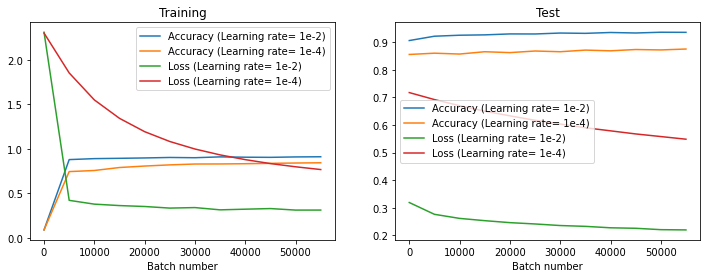

In [14]:
batch_number = np.arange(0, len(ydata), 5000/batch_size)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(121)
plt.plot(batch_number,accuracy_batch)
plt.plot(batch_number,accuracy_batch2)
plt.plot(batch_number,loss_batch)
plt.plot(batch_number,loss_batch2)
plt.xlabel('Batch number')
plt.legend(['Accuracy (Learning rate= 1e-2)','Accuracy (Learning rate= 1e-4)','Loss (Learning rate= 1e-2)','Loss (Learning rate= 1e-4)'])
plt.title('Training')

batch_number = np.arange(0, len(ydata_test)*6, 5000/batch_size)

x = fig.add_subplot(122)
plt.plot(batch_number,accuracy_batch_test)
plt.plot(batch_number,accuracy_batch_test2)
plt.plot(batch_number,loss_batch_test)
plt.plot(batch_number,loss_batch_test2)
plt.xlabel('Batch number')
plt.legend(['Accuracy (Learning rate= 1e-2)','Accuracy (Learning rate= 1e-4)','Loss (Learning rate= 1e-2)','Loss (Learning rate= 1e-4)'])
plt.title('Test')
plt.show()

In [17]:
print(accuracy)

0.8976833333333334


(i) With learning rate = 0.01, it took less than 10,000 iterations to acheive the comparable performance with batch gradient descent (~0.88). With learning rate = 0.0001, it took more than 150,000 iterations to acheive the comparable performance. With higher learning rate, the model learned faster.

(ii) To acheive 88% accuracy in the training set, the batch gradient-descent model took 200 iterations. So, the computational complexity is 60,000*200 = 12,000,000. To acheive the comparable performance, the SGD took less than 10,000 iterations with a single-batch. So, the computational complexity is 10,000*1 = 10,000. The computational complexity is less in SGD.

In [15]:
# Hyperparameters for mini-batch size of 100

iterations = 10
batch_size = 100

# Initial weights and bias
weights = np.zeros((xdata.shape[1],num_classes))
bias = np.zeros((1,num_classes))

# Train the model with 1e-2 learning rate
accuracy, cost, weights_train, bias_train, accuracy_batch, loss_batch = SGD_softmax(xdata, ydata, weights, bias, 1e-2, iterations, batch_size)

# Test the model with 1e-2 learning rate
iterations = 60
accuracy_test, cost_test, weights_train_test, bias_train_test, accuracy_batch_test, loss_batch_test = SGD_softmax(xdata_test, ydata_test, weights_train, bias_train, 1e-2, iterations, batch_size)

# Initial weights and bias
weights = np.zeros((xdata.shape[1],num_classes))
bias = np.zeros((1,num_classes))

# Train the model with 1e-4 learning rate
iterations = 10
accuracy2, cost2, weights_train2, bias_train2, accuracy_batch2, loss_batch2 = SGD_softmax(xdata, ydata, weights, bias, 1e-4, iterations, batch_size)

# Test the model with 1e-4 learning rate
iterations = 60
accuracy_test2, cost_test2, weights_train_test2, bias_train_test2, accuracy_batch_test2, loss_batch_test2 = SGD_softmax(xdata_test, ydata_test, weights_train2, bias_train2, 1e-4, iterations, batch_size)


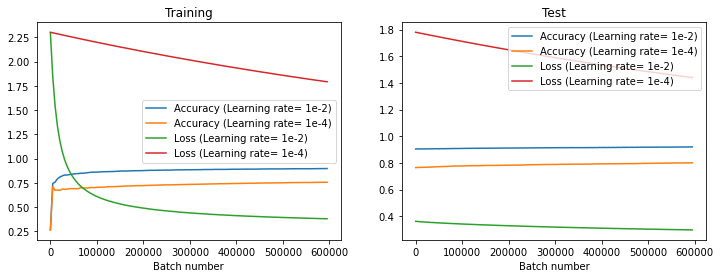

In [16]:
batch_number = np.arange(0, len(ydata)*10, 5000)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(121)
plt.plot(batch_number,accuracy_batch)
plt.plot(batch_number,accuracy_batch2)
plt.plot(batch_number,loss_batch)
plt.plot(batch_number,loss_batch2)
plt.xlabel('Batch number')
plt.legend(['Accuracy (Learning rate= 1e-2)','Accuracy (Learning rate= 1e-4)','Loss (Learning rate= 1e-2)','Loss (Learning rate= 1e-4)'])
plt.title('Training')

batch_number = np.arange(0, len(ydata_test)*60, 5000)

x = fig.add_subplot(122)
plt.plot(batch_number,accuracy_batch_test)
plt.plot(batch_number,accuracy_batch_test2)
plt.plot(batch_number,loss_batch_test)
plt.plot(batch_number,loss_batch_test2)
plt.xlabel('Batch number')
plt.legend(['Accuracy (Learning rate= 1e-2)','Accuracy (Learning rate= 1e-4)','Loss (Learning rate= 1e-2)','Loss (Learning rate= 1e-4)'])
plt.title('Test')
plt.show()

(iii) With learning rate = 0.01, it took around 150,000 iterations to acheive the comparable performance with batch gradient descent (~0.88). With learning rate = 0.0001, it did not acheive the comparable performance up to 6,000,000 iterations. With higher learning rate, the model learned faster. To acheive 88% accuracy in the training set, the batch gradient-descent model took 200 iterations. So, the computational complexity is 60,000*200 = 12,000,000. To acheive the comparable performance, the SGD took around 150,000 iterations with a mini-batch with size = 100. So, the computational complexity is 150,000*100 = 1,500,000. The computational complexity is less in SGD.

(iv) Overall, to acheive ~88% performance, the computational complexity: 1) 100 sample mini-batch = 1,500,000, 2) the single-point mini-batch = 10,000, and 3) batch gradient descent = 12,000,000. From the experiment, the time to train the model to ~88% was shortest with the single-point mini-batch.

In [25]:
# Create .hd5 files
w_train = weights_train.T
b_train = bias_train.T.squeeze()

DATA_FNAME = 'WoojaeJeong_HW3_Prb3c.hd5'
with h5py.File(DATA_FNAME, 'w') as hf:
    hf.create_dataset('W', data = np.asarray(w_train))
    hf.create_dataset('b', data = np.asarray(b_train))